In [1]:
import pandas as pd 
import numpy as np
import re, nltk
from numpy import array
from keras.preprocessing.text import one_hot 
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [2]:
import pandas as pd
df1 = pd.read_csv(r'Alllanguages.csv', encoding ="utf-8")
df = df1.sample(frac =1)
display(df)

,sentence,AMH,Tigrinya,Lithaunian,Arabic,czech,Germany,French,Labels
5511,4 Babette 3 Miss Patty 2 Richard 1 LANE Gilmor...,4 ባቤት 3 ወይዘሪት ትዕግስት 2 ሪቻርድ 1 ሌን ጊልሞርግልብርቲ4,4 ባቤት 3 ወይዘሪት ትዕግስቲ 2 ሪቻርድ 1 ሎምን ጊልሞርጊስ,4 Babette 3 Miss Patty 2 Richard 1 Lane Gilmor...,4 Babette 3 Miss Patty 2 Richard 1 Lane Gilmor...,4 Babette 3 Miss Patty 2 Richard 1 Lane Gilmor...,4 Babette 3 Fräulein Patty 2 Richard 1 Lane Gi...,4 Babette 3 Miss Patty 2 Richard 1 Lane Gilmor...,2
1487,I guess you need a reading lesson Charlie,የንባብ ትምህርት ቻርሊ እንደሚያስፈልግህ እገምታለሁ,ናይ ንባብ ትምህርቲ ከም ዘድልየኻ ይግምት እየ ቻርሊ,"Manau, jums reikia skaitymo pamokos Charlie",أعتقد أنك بحاجة إلى درس في القراءة تشارلي,"Myslím, že potřebujete lekci čtení Charlie",Ich denke du brauchst eine Lesestunde Charlie,Je suppose que tu as besoin d'une leçon de lec...,0
5622,if this were true it would be good Because Ass...,ይህ እውነት ቢሆን ኖሮ አሳንጅ በማሪን ሌ ፔን ኢላማ ላይ ያነጣጠረ በመሆ...,ከምኡ እንተ ዝኸውን ነይሩ ፡ ኣሳንጅ ንሓለዋ ባሕሪ ዒላማ ምገበረ ነይሩ,"Jei tai būtų tiesa, tai būtų gerai, nes Assang...",إذا كان هذا صحيحًا ، فسيكون ذلك جيدًا لأن أسان...,"Kdyby to byla pravda, bylo by to dobré, protož...","Wenn dies wahr wäre, wäre es gut, weil Assange...","Si cela était vrai, ce serait bien car Assange...",2
1945,probably going to hell for this as well but po...,ምናልባትም ይህን ለማድረግ ወደ ሲኦል ቢሄድም ሊቀ ጳጳስ ፍራንሲስ ግን ከ...,ምናልባት ናብ ሲኦል ምኻድ ከምኡ እውን ጳጳስ ፍራንሲስ ናብ ቫቲካን ፈንጠ...,"Tikriausiai taip pat eidami į pragarą, tačiau ...",من المحتمل أن يذهب إلى الجحيم من أجل هذا أيضًا...,"Pravděpodobně za to také chodím do pekla, ale ...","Wahrscheinlich auch dafür zur Hölle, aber Paps...","Aller probablement en enfer pour cela aussi, m...",0
1250,He didnt fight anything thats his excuse just ...,ልክ እንደ ቻቬዝ ሰበብ የሆነውን ማንኛውንም ነገር ተጋድሎ አድርጓል ፤ ማ...,ምኽኒት ቻቬዝ ፡ ከምኡ ድማ ማዱሮስ ምኽኒት ምስ ኣቕረበ ፡ ነቲ ዘቕረቦ ...,"Jis nieko nekovojo, tai yra jo pasiteisinimas,...",لم يحارب أي شيء هذا عذرا مثلما كان عذر شافيز و...,"Nebojoval s ničím, co je jeho omluva, stejně j...","Er kämpfte nicht gegen etwas, was seine Entsch...","Il n'a pas combattu quoi que ce soit, c'est so...",0
...,...,...,...,...,...,...,...,...,...
3926,Even though i have my personal beliefs about a...,ፅንስ ስለማስወርድ የግል እምነቴ ቢኖረኝም እንኳ ሌሎች መብቶችን እንደማላ...,"ዋላ ""ኳ ብዛዕባ ምንጻል ጥንሲ ውልቃዊ እምነተይ እንተሃለወኒ ፡ ኣብ ልዕ...",Nors aš turiu savo asmeninių įsitikinimų apie ...,على الرغم من أن لدي معتقداتي الشخصية حول الإجه...,"I když mám své osobní přesvědčení o potratech,...",Obwohl ich meine persönlichen Überzeugungen üb...,Même si j'ai mes convictions personnelles sur ...,1
3231,if tim duncan played one more season we wouldv...,አንድ ተጨማሪ ወቅት ላይ ዶንሰን ቢጫወት ኖሮ 21 ክዳን እናስቀምጠው ነበር,ግዜ ዝደኸመ ዳንከን ኣብ ሓደ ወቕቲ እንተ ዝጻወት ፡ 21 መድሓኒ ምበልና...,"Jei Timas Duncanas žaidė dar vieną sezoną, mes...",إذا لعب تيم دنكان موسمًا آخر ، فسنكون قادرين ع...,"Pokud by Tim Duncan hrál ještě jednu sezónu, b...","Wenn Tim Duncan noch eine Saison spielte, wäre...","Si Tim Duncan jouait une saison de plus, nous ...",1
3802,good keep them away from the deplorables Thank...,ለፕሬዚዳንት ኦባማ ለ8 ዓመታት ያህል ሰላም አስገኝቶላቸው ከቆዩት አሳዛኝ...,ካብቲ ፕረዚደንት ኦባማ ን8 ዓመት ዝኣክል ሰላም ጉልባብ ብምግባር ዘስካሕ...,"Gerai, kad jie atitolintų nuo išvežamų daiktų,...",من الجيد أن تبقيهم بعيدًا عن المستجدات ، شكرًا...,"dobře, držte je dál od deplorables děkuji prez...","Gut, haltet sie von den bedauerlichen Dreieren...",Bon éloigne-les des déplorables merci le prési...,1
3298,You were better than my wildest dreams but Im ...,ከህልሜ በላይ ነበርክ ግን ኢም አሁንም ቢሆን ለጦቢ ድሃ ጦቢ ኬት ደስታ ...,ካብ ናይ በረኻ ሕልምታተይ ዝበልጽ እኳ እንተ ኰንካ ፡ ክሳዕ ሕጂ ሕጉስ ...,Tu buvai geresnis už mano laukiškiaus,كنت أفضل من أعنف أحلامي ولكني ما زلت لست سعيدً...,"Byl jsi lepší než moje nejdivočejší sny, ale s...","Du warst besser als meine wildesten Träume, ab...",Tu étais meilleur que mes rêves les plus fous ...,1


In [3]:
sentence = df.AMH.values.tolist()
sentiment = df.Labels.values.tolist()

In [4]:
sentence_a = np.array(sentence)
sentiment_a =np.array(sentiment)

In [5]:
print(len(sentence_a))
print(len(sentiment_a))
print(sentiment_a[0:10])

7036
7036
[2 0 2 0 0 2 0 0 0 0]


In [6]:
Comm = []
for el in sentence_a:
    sent= re.sub(r'[A-Z]+', '', el)
    sent1 = re.sub(r'[a-z]+', '',sent)
    sent2= re.sub(r'[^\w]', ' ', sent1)
    
    Comm.append(sent2)

In [7]:
print(len(Comm))
print(Comm[0:10])

7036
['4 ባቤት 3 ወይዘሪት ትዕግስት 2 ሪቻርድ 1 ሌን ጊልሞርግልብርቲ4', 'የንባብ ትምህርት ቻርሊ እንደሚያስፈልግህ እገምታለሁ', 'ይህ እውነት ቢሆን ኖሮ አሳንጅ በማሪን ሌ ፔን ኢላማ ላይ ያነጣጠረ በመሆኑ ጥሩ ነበር', 'ምናልባትም ይህን ለማድረግ ወደ ሲኦል ቢሄድም ሊቀ ጳጳስ ፍራንሲስ ግን ከቫቲካን ሜሪ ክሪስቲማዎች ጋር የሚያጋጩ አንዳንድ የጅምላ ጭፍጨፋዎች ያስፈልጓቸው ይሆናል', 'ልክ እንደ ቻቬዝ ሰበብ የሆነውን ማንኛውንም ነገር ተጋድሎ አድርጓል   ማዱሮስ ደግሞ ሰበብ አስባብ አቅርቧል', 'ከአንበሳ በግማሽ ማሳረጊያ ላይ ሎል ጀስቲን ግንድ ከበሮ ላይ', 'እስቲ አስቡት ህጻናቱ ቶክሲክ ጭስ ጭስ ጭስ ጭስ ጭስ የሆነውን ሞሱሎፍ ለሕፃናት ጥማት በኢራቅ በኩል ይጫወታሉ', 'ትሬምፕስ መጥፎው ሂላሪ አይ ኤስ የበለጠ የቴፒ ቅንጣት ታህል ለማግኘት ብቁ እንዳልሆነች ቃል የገባውን ቃል ለማየት ብቁ አልሆነም', 'ይህን ግድግዳ ለመሥራት ኪላሪ ድራፍት የተባለውን መጥፎ ማህፀን በሙሉ አፍኖ በማውጣት ልጅ መውለድ ችሏል', 'የሻሮን መርፌዎች ሜላኒያ መለከት እየነፉ ሕዝቡን እያቀጨጩ ነው']


In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
y = np.array(sentiment_a)
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(y)

In [12]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(vec)
print(y[1])
print(y[21])

[1. 0. 0.]
[0. 1. 0.]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(Comm, y , test_size = 0.20, random_state = 42, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 1, shuffle = True)
print(len(X_train))
print(len(X_val))
print(len(X_test))

4502
1126
1408


In [14]:
tokenizer = Tokenizer(num_words = 100000, filters ='!"#$%&()*+,-./;<=>?@][\\]^{|}~\t\n')
tokenizer.fit_on_texts(X_train)
index_of_words = tokenizer.word_index
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

In [15]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)
X_val = pad_sequences(X_val, padding = 'post', maxlen = maxlen)

In [17]:
from numpy import array
from numpy import asarray
from numpy import zeros
import pickle 
with open ("C:/Users/senug/Documents/Project 1 PHD/EmbeddingAmh.pkl", 'rb') as f:
    embeddings_index = pickle.load(f)
    print('Total %s word vectors.' % len(embeddings_index))

Total 41042 word vectors.


In [18]:
EMBEDDINGS_DIM = 100
  
embedding_matrix = np.random.random((len(index_of_words) + 1, EMBEDDINGS_DIM))
for word, i in index_of_words.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print('Embedding matrix shape', embedding_matrix.shape)

ValueError: could not broadcast input array from shape (300,) into shape (100,)

In [19]:
import numpy as np 
from keras.layers.convolutional import Conv1D
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import LSTM, SpatialDropout1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM, SpatialDropout1D, Bidirectional
from keras.preprocessing import sequence 
import pandas as pd 
from gensim.models import Phrases
from gensim.models.phrases import Phraser 
from keras import backend as K
lstm_out = 196
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights = [embedding_matrix], input_length=maxlen, trainable = False)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(128)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics =['acc'])
model.compile(loss ='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['acc'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1974100   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,225,239
Trainable params: 251,139
Non-trainable params: 1,974,100
_________________________________________________________________
None


In [20]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.01, patience = 4, verbose = 1)
callbacks_list = [early_stopping]
hist = model.fit(X_train, y_train, epochs = 50, batch_size =128, verbose = 1, validation_data = (X_val, y_val))
#y_test = model.predict(X_test, batch_size = 1024, verbose = 1)

Epoch 1/50
36/36 [==============================] - 23s 444ms/step - loss: 1.1068 - acc: 0.3436 - val_loss: 1.1161 - val_acc: 0.3517
Epoch 2/50
36/36 [==============================] - 15s 407ms/step - loss: 1.0938 - acc: 0.3763 - val_loss: 1.0939 - val_acc: 0.3508
Epoch 3/50
36/36 [==============================] - 15s 414ms/step - loss: 1.0860 - acc: 0.3896 - val_loss: 1.0939 - val_acc: 0.3517
Epoch 4/50
36/36 [==============================] - 15s 411ms/step - loss: 1.0863 - acc: 0.3876 - val_loss: 1.0878 - val_acc: 0.3925
Epoch 5/50
36/36 [==============================] - 14s 398ms/step - loss: 1.0862 - acc: 0.3878 - val_loss: 1.0808 - val_acc: 0.3996
Epoch 6/50
36/36 [==============================] - 15s 403ms/step - loss: 1.0856 - acc: 0.3894 - val_loss: 1.0785 - val_acc: 0.3996
Epoch 7/50
36/36 [==============================] - 14s 393ms/step - loss: 1.0788 - acc: 0.4014 - val_loss: 1.0848 - val_acc: 0.3721
Epoch 8/50
36/36 [==============================] - 14s 397ms/step - 

In [21]:
score,acc  = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', acc)

44/44 [==============================] - 3s 46ms/step - loss: 2.3811 - acc: 0.3864
Test accuracy: 0.3863636255264282


In [22]:
_,train_acc = model.evaluate(X_train,y_train, verbose = 0)
print('Train accuracy:', train_acc)

Train accuracy: 0.938027560710907


In [23]:
a, b = model.evaluate(X_val, y_val, verbose =0)
print(b)

0.4236234426498413


In [24]:
yhat_probs = model.predict(X_test, verbose = 1)
classes_x =np.argmax(yhat_probs, axis =1)

44/44 [==============================] - 3s 41ms/step


In [25]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis =1)
y_test = np.argmax(y_test, axis = 1)
print(y_pred[0:100])
print(y_test[0:10])

[0 1 1 2 1 2 2 2 2 0 1 2 0 0 2 0 2 0 0 0 1 2 1 2 2 2 0 0 1 2 1 1 1 1 1 1 1
 0 1 1 2 0 2 0 1 1 1 1 1 0 2 1 2 1 2 0 0 1 1 1 1 2 1 2 0 1 1 1 0 0 1 0 1 2
 2 1 2 1 2 2 0 1 1 2 0 1 1 1 1 1 2 1 1 0 1 1 2 1 2 1]
[0 2 0 0 1 2 1 1 1 0]


In [26]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n')
print(confusion)


Confusion Matrix

[[139 220 130]
 [ 92 194 171]
 [ 92 159 211]]


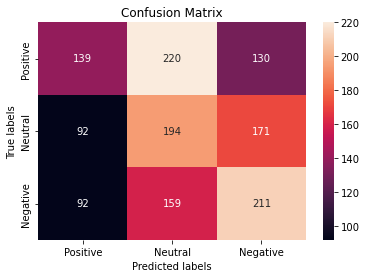

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Neutral', 'Negative']);

In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.28      0.34       489
           1       0.34      0.42      0.38       457
           2       0.41      0.46      0.43       462

    accuracy                           0.39      1408
   macro avg       0.39      0.39      0.38      1408
weighted avg       0.39      0.39      0.38      1408

